In [16]:
import numpy as np
import scipy
import networkx

import matplotlib.pyplot as plt

import notears

### Generate random DAG

Generating random DAG with 10 nodes, 10 edges

In [17]:
num_nodes = 10
num_edges = 10
edge_coefficient_range = [0.5, 2.0]

true_adj_mat, _ = notears.utils.generate_random_dag(num_nodes, num_edges, edge_coefficient_range=edge_coefficient_range)

### Simulate data

Simulating 1000 samples from the random DAG, with error terms $\epsilon_i \sim N(0, 1)$

In [18]:
n_sample = 1000

data = notears.utils.simulate_from_dag_lg(true_adj_mat, n_sample, mean=0, variance=1)

### Learn graph with NOTEARS

In [19]:
output_dict = notears.run(notears.notears_standard, data, notears.loss.least_squares_loss, notears.loss.least_squares_loss_grad, e=1e-8, verbose=False)

`output_dict` contains keys `h`, `loss` and `W`

In [20]:
print('Acyclicity loss: {}'.format(output_dict['h']))
print('Least squares loss: {}'.format(output_dict['loss']))

Acyclicity loss: 4.5500758716343626e-09
Least squares loss: 5.031188452098607


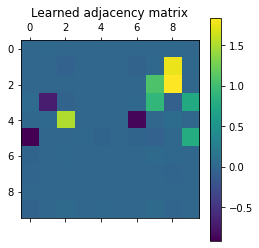

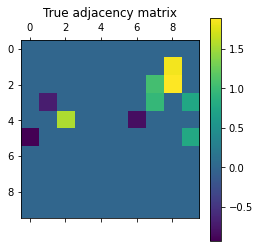

In [21]:
plt.matshow(output_dict['W'])
plt.title("Learned adjacency matrix")
plt.colorbar()

plt.matshow(true_adj_mat)
plt.title("True adjacency matrix")
plt.colorbar()

### Measuring performance & thresholding learned graph

The graph returned by NOTEARS will not in general be acyclic -- an acyclic graph can be recovered by removing the lowest weighted edges (in magnitude) until the remaining graph is acyclic.  (The included utility returnes a binary adjacency matrix.)

In [22]:
acyclic_W = notears.utils.threshold_output(output_dict['W'])

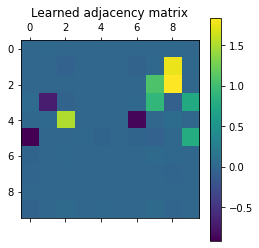

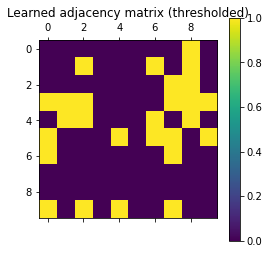

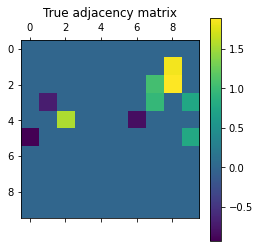

In [23]:
plt.matshow(output_dict['W'])
plt.title("Learned adjacency matrix")
plt.colorbar()

plt.matshow(acyclic_W)
plt.title("Learned adjacency matrix (thresholded)")
plt.colorbar()

plt.matshow(true_adj_mat)
plt.title("True adjacency matrix")
plt.colorbar()

Comparing the learned graph to the true graph in terms of precision, recall, and specificity

In [24]:
cs = notears.utils.compare_graphs_undirected(true_adj_mat, acyclic_W)

In [25]:
print('True positives: {}\nFalse positives: {}\nTrue negatives: {}\nFalse negatives: {}'\
      .format(cs[0], cs[1], cs[2], cs[3]))

True positives: 10
False positives: 17
True negatives: 73
False negatives: 0


In [31]:
print("Precision: {}\nRecall: {}\nSpecificity: {}".format(notears.utils.compare_graphs_precision(cs), notears.utils.compare_graphs_recall(cs),notears.utils.compare_graphs_specificity(cs)))


Precision: 0.37037037037037035
Recall: 1.0
Specificity: 0.8111111111111111
